In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('/Users/guanxi/Desktop/Final Project/label and feature dataset.csv')

In [6]:
data.columns.tolist()

['FIPS',
 'Qualifying Name',
 'State Postal Abbreviation',
 'Summary Level',
 'Geographic Component',
 'State (FIPS Code)',
 'County of current residence',
 'Census Tract',
 'Area Name',
 'Tribal Tract',
 'Total Population',
 'Total Population:',
 'Total Population: White Alone',
 'Total Population: Black or African American Alone',
 'Total Population: Asian Alone',
 '% Total Population: White Alone',
 '% Total Population: Black or African American Alone',
 '% Total Population: Asian Alone',
 'Per Capita Income (In 2022 Inflation Adjusted Dollars)',
 'Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved WithIn Same County',
 'Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved From Different County WithIn Same State',
 'Population 1 Year and Over in Households in the United States: Householder Lived in Renter-Occupied Housing Units: Moved From Differe

In [14]:
data["Per Capita Income (In 2022 Inflation Adjusted Dollars)"]

0       119425.0
1       112376.0
2        99277.0
3       106887.0
4        57983.0
          ...   
9124     27600.0
9125     42818.0
9126     53489.0
9127     24601.0
9128     39843.0
Name: Per Capita Income (In 2022 Inflation Adjusted Dollars), Length: 9129, dtype: float64

In [10]:
data['FIPS']

0       6001400100
1       6001400200
2       6001400300
3       6001400400
4       6001400500
           ...    
9124    6115040902
9125    6115041001
9126    6115041002
9127    6115041101
9128    6115041102
Name: FIPS, Length: 9129, dtype: int64

In [7]:
median= data["Per Capita Income (In 2022 Inflation Adjusted Dollars)"].median()

In [8]:
label = pd.DataFrame()

In [9]:
for index, row in data.iterrows():
    
    fips = row['FIPS']
    
    # 判断条件并赋值
    if row['% Total Population: White Alone'] > 50 and row['Per Capita Income (In 2022 Inflation Adjusted Dollars)'] > median:
        value = "1"
    elif row['% Total Population: White Alone'] > 50 and row['Per Capita Income (In 2022 Inflation Adjusted Dollars)'] < median:
        value = "2"
    elif row['% Total Population: Black or African American Alone'] > 50 and row['Per Capita Income (In 2022 Inflation Adjusted Dollars)'] > median:
        value = "3"
    elif row['% Total Population: Black or African American Alone'] > 50 and row['Per Capita Income (In 2022 Inflation Adjusted Dollars)'] < median:
        value = "4"
    elif row['% Total Population: Asian Alone'] > 50 and row['Per Capita Income (In 2022 Inflation Adjusted Dollars)'] > median:
        value = "5"
    elif row['% Total Population: Asian Alone'] > 50 and row['Per Capita Income (In 2022 Inflation Adjusted Dollars)'] < median:
        value = "6"
    else:
        value = "7"
    
    # 将值添加到新的 DataFrame 中
    label = label.append({'FIPS': fips, 'GROUP': value}, ignore_index=True)

/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_922/4047641354.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label = label.append({'FIPS': fips, 'GROUP': value}, ignore_index=True)
/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_922/4047641354.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label = label.append({'FIPS': fips, 'GROUP': value}, ignore_index=True)
/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_922/4047641354.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label = label.append({'FIPS': fips, 'GROUP': value}, ignore_index=True)
/var/folders/nt/g8pbq5q93kx0tly83_qxb1040000gn/T/ipykernel_922/4047641354.py:22: FutureWarning: The frame.append method is deprecated an

In [10]:
label["GROUP"].value_counts()

7    4162
1    3071
2    1347
5     358
6     129
4      38
3      24
Name: GROUP, dtype: int64

In [ ]:
label.to_excel("/Users/guanxi/Desktop/Final Project/label.xlsx")

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt


census_tracts = gpd.read_file("/Users/guanxi/Desktop/Final Project/tl_2023_06_tract/tl_2023_06_tract.shp")

In [14]:
census_tracts['GEOID'] = census_tracts['GEOID'].str[1:]

In [17]:
label['FIPS'] = label['FIPS'].astype(str)

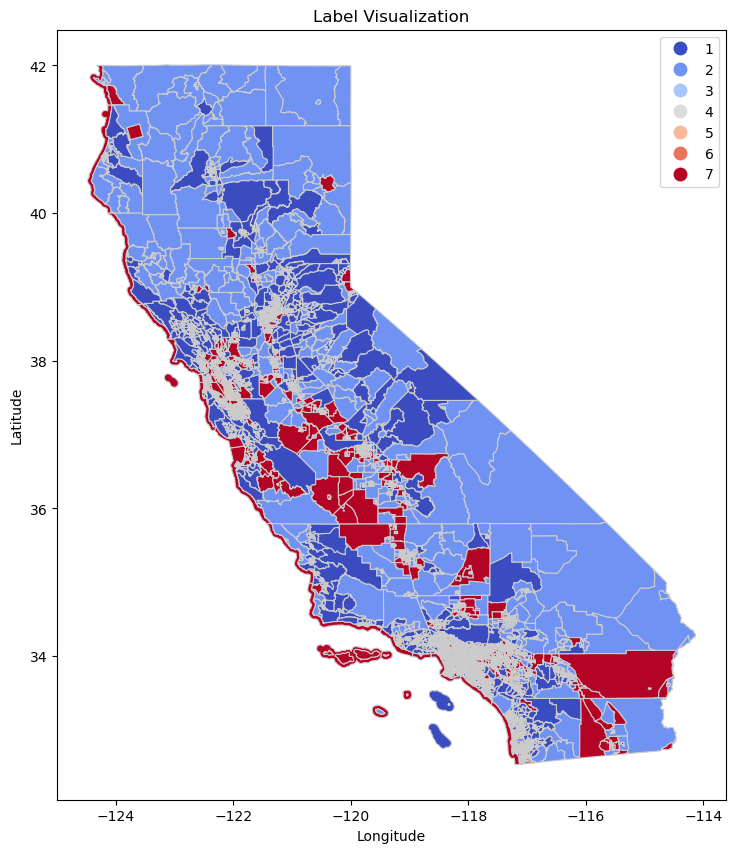

In [18]:
merged_data = census_tracts.merge(label,right_on="FIPS",left_on='GEOID', how='inner')

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='GROUP', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Label Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
